# Genomic diagnosis of rare disease
***

## **Step 1.** We start this session with a VCF file from our patient.

+ We know that mutations associated with Hemophilia occur on the X chromosome, so we will analyze vriants on the X chromosome of our patient.

### 1. Our VCF file:
+ `ls data/*HemophiliaPatient*`

```
data/HemophiliaPatient.chrX.vcf
```

### 2. Let's look at this patient's VCF file.

+ `head data/HemophiliaPatient.chrX.vcf`

```
##fileformat=VCFv4.2
##fileDate=20210818
##source=PLINKv1.90
##contig=<ID=23,length=156030593>
##INFO=<ID=PR,Number=0,Type=Flag,Description="Provisional reference allele, may not be based on real reference genome">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	Patient101
23	12568	.	C	T	.	.	PR	GT	0/0
23	12583	.	C	T	.	.	PR	GT	0/0
23	13587	.	T	C	.	.	PR	GT	0/0
```

### 4. We produce BED file (and other related files) for the patient 

+ `ls data/HemophiliaPatient*`

```
data/randomCLMIndividual.chrX.bed  data/randomCLMIndividual.chrX.log
data/randomCLMIndividual.chrX.bim  data/randomCLMIndividual.chrX.nosex
data/randomCLMIndividual.chrX.fam  data/randomCLMIndividual.txt
```

+ `cat data/HemophiliaPatient.chrX.fam`

```
HG01459 HG01459 0 0 0 -9
```

***
___

## **Step 2.** We will now process this file through VEP (Ensembl Variant Effect Predictor) tool; [VEP Docs](https://useast.ensembl.org/info/docs/tools/vep/script/vep_tutorial.html)

### 1. VEP is a straightforward tool which can be installed using conda.

> Keep in mind that VEP needs chromosome numbers like: 1,2,3,...22,X

In [33]:
!vep -i data/HemophiliaPatient.chrX.modified.vcf --cache

### 2. VEP produces two output files, and **variant_effect_output.txt** file has the final output.

In [36]:
!ls variant_effect_output*

variant_effect_output.txt  variant_effect_output.txt_summary.html


### 3. We will get the [ClinVar](https://www.ncbi.nlm.nih.gov/clinvar/) vcf file for chromosome X. ClinVar holds variants associated with diseases and supported through published evidence.

In [38]:
!wget wget https://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh38/clinvar.vcf.gz

--2021-08-19 15:05:35--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2021-08-19 15:05:35--  https://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh38/clinvar.vcf.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.230, 130.14.250.7, 2607:f220:41f:250::229, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41938342 (40M) [application/x-gzip]
Saving to: ‘clinvar.vcf.gz’

100%[======================================>] 41,938,342  60.8MB/s   in 0.7s   

2021-08-19 15:05:36 (60.8 MB/s) - ‘clinvar.vcf.gz’ saved [41938342/41938342]

FINISHED --2021-08-19 15:05:36--
Total wall clock time: 0.8s
Downloaded: 1 files, 40M in 0.7s (60.8 MB/s)


### 4. Now let's have a look at the VEP output file.

In [68]:
!head data/HemophiliaPatient.VEP.output -n48 | tail
!wc data/HemophiliaPatient.VEP.output

## DISTANCE : Shortest distance from variant to transcript
## STRAND : Strand of the feature (1/-1)
## FLAGS : Transcript quality flags
#Uploaded_variation	Location	Allele	Gene	Feature	Feature_type	Consequence	cDNA_position	CDS_position	Protein_position	Amino_acids	Codons	Existing_variation	Extra
.	X:12568	T	-	-	-	intergenic_variant	-	-	-	-	-	-	IMPACT=MODIFIER
.	X:12583	T	-	-	-	intergenic_variant	-	-	-	-	-	-	IMPACT=MODIFIER
.	X:13587	C	-	-	-	intergenic_variant	-	-	-	-	-	-	IMPACT=MODIFIER
.	X:13590	C	-	-	-	intergenic_variant	-	-	-	-	-	-	IMPACT=MODIFIER
.	X:13615	G	-	-	-	intergenic_variant	-	-	-	-	-	-	IMPACT=MODIFIER
.	X:13878	C	-	-	-	intergenic_variant	-	-	-	-	-	-	IMPACT=MODIFIER
  279518  3912935 31925208 data/HemophiliaPatient.VEP.output


#### We see this patient has 279,518 variants, but not all variants are harmful. In fact most of them are benign!

### 5. Let's intersect the VEP output file with the ClinVar chromosome X file.

In [70]:
!cat data/HemophiliaPatient.VEP.output | grep "missense_variant" | cut -f1-4 | uniq | cut -f2 | cut -f2 -d ":" | xargs -I var sh -c 'echo "X,var"' > data/HemophiliaPatient.missenseVariants.chrX.positions.txt
!sed -i -E 's/("([^"]*)")?,/\2\t/g' data/HemophiliaPatient.missenseVariants.chrX.positions.txt 

### 6. Finally, let's look at the **Pthogenic** variants.

In [71]:
!grep -F -f data/HemophiliaPatient.missenseVariants.chrX.positions.txt data/clinvar.chrX.sorted.vcf | grep "CLNSIG=Pathogenic"

X	640862	265858	G	C	.	.	ALLELEID=260558;CLNDISDB=MONDO:MONDO:0010367,MedGen:C1845118,OMIM:300582,Orphanet:ORPHA314795;CLNDN=Short_stature,_idiopathic,_X-linked;CLNHGVS=NC_000023.11:g.640862G>C;CLNREVSTAT=no_assertion_criteria_provided;CLNSIG=Pathogenic;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=SHOX:6473;MC=SO:0001583|missense_variant;ORIGIN=0;RS=778921118
X	1290449	10355	G	A	.	.	ALLELEID=25394;CLNDISDB=MONDO:MONDO:0010424,MedGen:C2677877,OMIM:300770;CLNDN=Surfactant_metabolism_dysfunction,_pulmonary,_4;CLNHGVS=NC_000023.11:g.1290449G>A;CLNREVSTAT=no_assertion_criteria_provided;CLNSIG=Pathogenic;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;CLNVI=OMIM_Allelic_Variant:306250.0002|UniProtKB_(protein):P15509#VAR_058507;GENEINFO=CSF2RA:1438;MC=SO:0001583|missense_variant,SO:0001619|non-coding_transcript_variant;ORIGIN=1;RS=137852353
X	154863125	10318	G	A	.	.	AF_EXAC=0.00001;ALLELEID=25357;CLNDISDB=MONDO:MONDO:0010602,MedGen:C0019069,OMIM:306700,Orphanet:ORPHA98878,SNO

### We obatined 3 variants that are tagged as **Pathogenic** by **VEP & ClinVar**.

***
___

## Step 3. Let's look at one of these variants through [varsome, a variant discovery tool](https://varsome.com/)

Varsome is an easy online tool that provides with varinat summaries and ACMG classifications.

### 1. Preparing the varsome query:
+ Varsome accepts an RS-ID of a variant directly. But the file we were provided did not have an RS-ID.
+ We will create out own query as specified by the varsome:
    + chr-pos-refAllele-altAllele = `X-154863125-G-A`

### 2. Inserting the variant in varsome yields us the following:

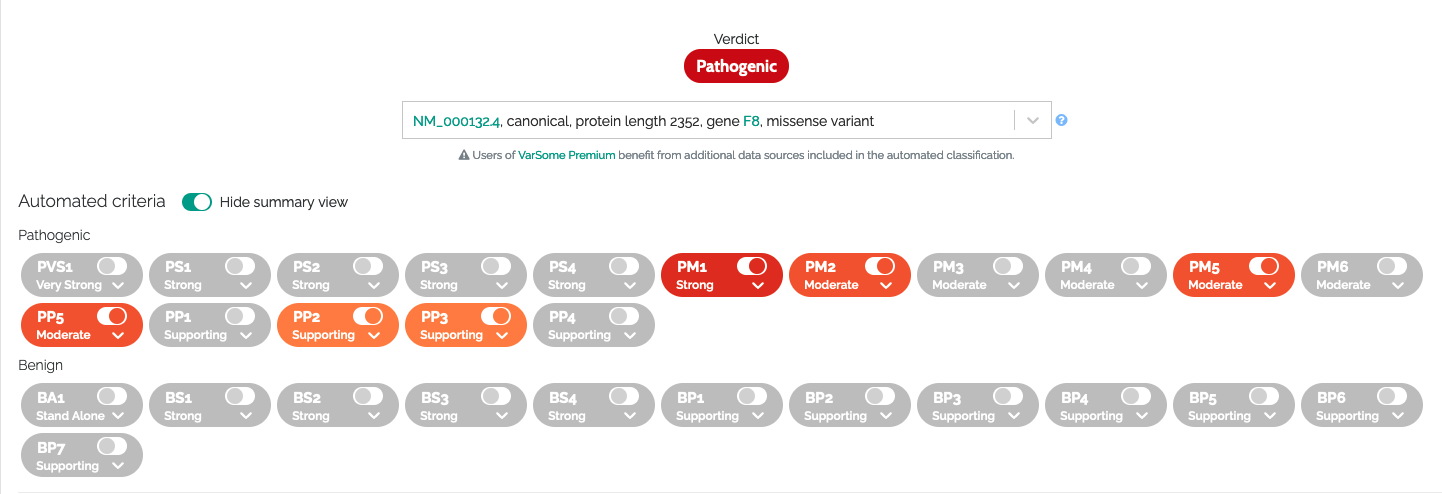

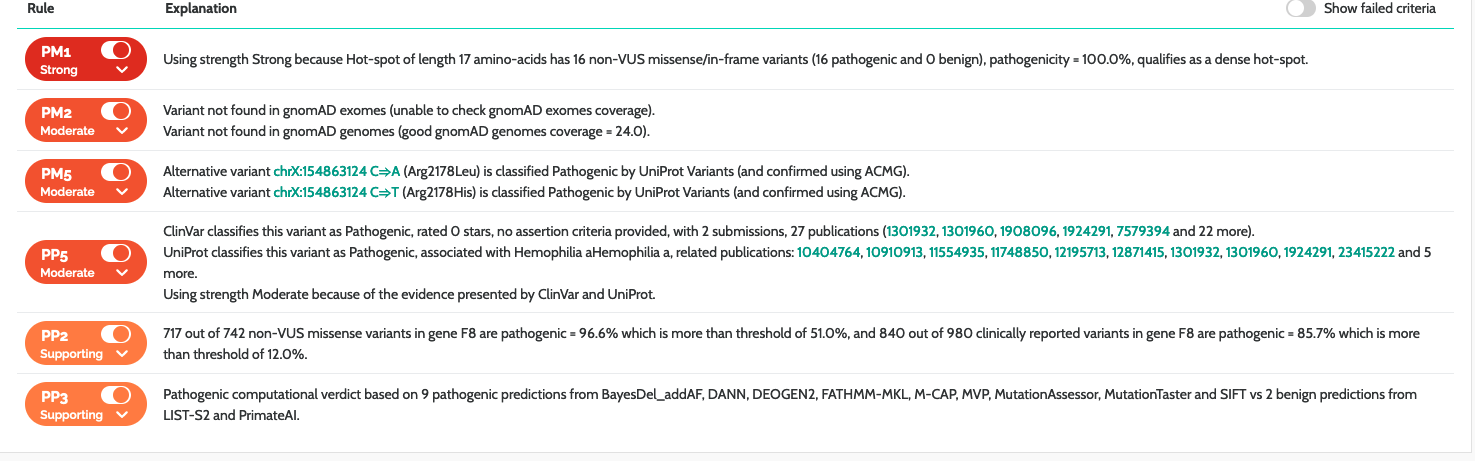

In [5]:
library("IRdisplay")
display_png(file="data/varsome-result-1.png")
display_png(file="data/varsome-result-2.png")

### We can see that the variant is tagged as **Pathogenic** and a few ACMG categories light up. ACMG categories to pay attention to:
+ PM1 (Strong) - 100% pathogenicity 
+ PP5 (Moderate) - ClinVar classifies this as pathogenic; we already know that. 
    + **But PP5 mentions that this variant is associated with Hemophilia and supported by at least 15 publications (PubMed IDs given)**
+ PP2 (Supporting) 